In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Import data and add labels

corona_5g = pd.read_csv("~/Desktop/twitterAnalysis/FakeNews/dataset/graphs/5g_corona_conspiracy/feature_df_5g_corona_conspiracy.csv")
corona_5g['label'] = '2'
corona_5g['conspiracy'] = '1'
corona_5g['MediaEval'] = '1'

non_conspiracy = pd.read_csv("~/Desktop/twitterAnalysis/FakeNews/dataset/graphs/non_conspiracy/feature_df_non_conspiracy.csv")
non_conspiracy['label'] = '1'
non_conspiracy['conspiracy'] = '0'
non_conspiracy['MediaEval'] = '0'

other_conspiracy = pd.read_csv("~/Desktop/twitterAnalysis/FakeNews/dataset/graphs/other_conspiracy/feature_df_other_conspiracy.csv")
other_conspiracy['label'] = '0'
other_conspiracy['conspiracy'] = '1'
other_conspiracy['MediaEval'] = '0'

all_data = corona_5g.append(non_conspiracy)
all_data = all_data.append(other_conspiracy)

all_data = all_data.dropna()
# print(all_data)

In [3]:
# Split into train and test sets

y = all_data[['label', 'MediaEval', 'conspiracy']]
y = pd.DataFrame(y)
y = y.reset_index()
x_unprocessed = all_data.drop(columns=['label', 'MediaEval', 'conspiracy'])
x = StandardScaler().fit_transform(x_unprocessed)

/Users/maria/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/maria/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
# Seperate by coarse ii

pca = PCA(n_components=5)
pc_data = pca.fit_transform(x)
pc_df = pd.DataFrame(data = pc_data)
pc_all = pd.concat([pc_df, y[['conspiracy']]], axis=1, ignore_index=True)

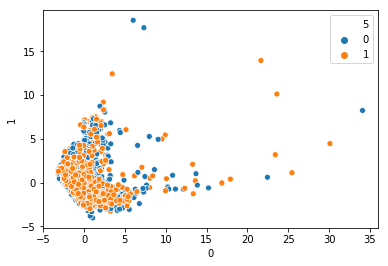

In [5]:
sns.scatterplot(data=pc_all, x=0, y=1, hue=5)

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as plt

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
y = pc_all.iloc[:,1]
x = pc_all.iloc[:,0]
z = pc_all.iloc[:,2]
c = pc_all.iloc[:,5]
colors = {'0':'orange', '1':'blue', '2':'green'}
ax.scatter(x,y,z, color=c.map(colors))
plt.title('First 3 Principal Components')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_zlabel('PC3')

TypeError: 'module' object is not callable

In [7]:
pca.explained_variance_ratio_

array([0.37307335, 0.23672112, 0.10886521, 0.08436978, 0.06324037])

In [8]:
# Seperate by coarse i

pca = PCA(n_components=5)
pc_data = pca.fit_transform(x)
pc_df = pd.DataFrame(data = pc_data)
pc_all = pd.concat([pc_df, y[['MediaEval']]], axis=1, ignore_index=True)

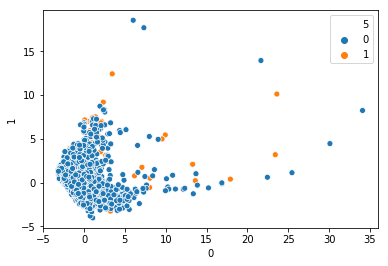

In [9]:
sns.scatterplot(data=pc_all, x=0, y=1, hue=5)

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
y = pc_all.iloc[:,1]
x = pc_all.iloc[:,0]
z = pc_all.iloc[:,2]
c = pc_all.iloc[:,5]
colors = {'no':'orange', 'yes':'blue'}
ax.scatter(x,y,z, color=c.map(colors))
plt.title('First 3 Principal Components')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_zlabel('PC3')

TypeError: 'module' object is not callable

In [14]:
pca = PCA(n_components=5)
pc_data = pca.fit_transform(x)
pc_df = pd.DataFrame(data = pc_data)
pc_all = pd.concat([pc_df, y[['label']]], axis=1, ignore_index=True)

In [15]:
sns.scatterplot(data=pc_all, x=0, y=1, hue=5)

AttributeError: 'str' object has no attribute 'view'

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
y = pc_all.iloc[:,1]
x = pc_all.iloc[:,0]
z = pc_all.iloc[:,2]
c = pc_all.iloc[:,5]
colors = {'no':'orange', 'yes':'blue'}
ax.scatter(x,y,z, color=c.map(colors))
plt.title('First 3 Principal Components')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_zlabel('PC3')